In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Library.Lin_alg import*
import prettytable as pt
import time
from tqdm import tqdm, trange

# Q.1 Solve the system using Cholesky decomposition (check for symmetric matrix) and Gauss-Seidel to a precision of $10^{−6}$

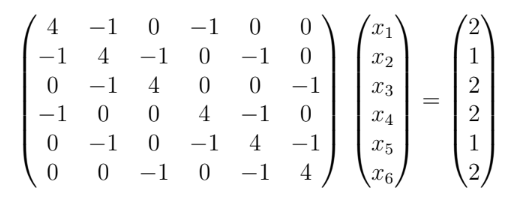

In [2]:
#constracting the matrix
A = [
    [4, -1, 0, -1, 0, 0], 
    [-1, 4 , -1, 0, -1, 0], 
    [0, -1, 4, 0, 0, -1],
    [-1, 0, 0, 4, -1, 0], 
    [0, -1, 0, -1, 4, -1], 
    [0, 0, -1, 0, -1, 4]
]
#check the symmetry of the matrix
b = [[2], [1], [2], [2], [1], [2]]

In [3]:
K = LinearEquationDirect(A, b)
K.Symmetric(A)

True

In [4]:
#Use cholesky method to solve the linear equation
C = K.Cholesky()
print("The solution of the linear equation is: ")
#Print in a table using prettytable
table = pt.PrettyTable()
table.field_names = ["X1", "X2", "X3", "X4", "X5", "X6"]
table.add_row([C[0], C[1], C[2], C[3], C[4], C[5]])
print(table)

The solution of the linear equation is: 
+-------+-------+-------+-------+----------+-------+
|   X1  |   X2  |   X3  |   X4  |    X5    |   X6  |
+-------+-------+-------+-------+----------+-------+
| [1.0] | [1.0] | [1.0] | [1.0] | [1.0001] | [1.0] |
+-------+-------+-------+-------+----------+-------+


In [5]:
I = LinearEquationIndirect(A, b)
G = I.Gauss_Seidel(A,b,6)


Number of iterations is: 7 
 The solution vector x for gauss seidel method is:

[[0.9184604230595137], [0.9488166745040213], [0.7268709866623936], [0.7250250177340336], [0.7134519420509559], [0.5429765977086388]]


# Q.2 Solve the following linear equation by Gauss-Jordon and LU factorization.

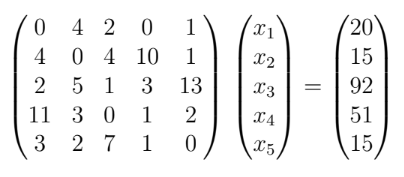

In [6]:
#matrix generation 
E = [[0, 4 ,2 ,0 ,1],
     [4, 0 ,4, 10, 1],
     [2,5,1,3,13],
     [11,3,0,1,2],
     [3,2,7,1,0]]
F = [20,15,92,51,15]

In [7]:
#Use gauss jordan method to solve the linear equation
i = LinearEquationDirect(E, F)
g = i.Gauss_Jordan()
#print the solution using prettytable
print("The solution of the linear equation using Gauss Jordan method is: ")
table = pt.PrettyTable()
table.field_names = ["X1", "X2", "X3", "X4", "X5"]
table.add_row([g[0], g[1], g[2], g[3], g[4]])
print(table)

The solution of the linear equation using Gauss Jordan method is: 
+--------------------+--------------------+----------------------+----------------------+-------------------+
|         X1         |         X2         |          X3          |          X4          |         X5        |
+--------------------+--------------------+----------------------+----------------------+-------------------+
| 2.6746020516448534 | 3.7118853908737197 | -0.05330739299610965 | -0.07442518570923262 | 5.259073222497346 |
+--------------------+--------------------+----------------------+----------------------+-------------------+


In [8]:
#Use LU decompose method to solve the linear equation
l = i.LU_decompose()
print("The solution of the linear equation using LU decomposition is: ")
table = pt.PrettyTable()
table.field_names = ["X1", "X2", "X3", "X4", "X5"]
table.add_row([l[0], l[1], l[2], l[3], l[4]])
print(table)

The solution of the linear equation using LU decomposition is: 
+--------------------+--------------------+----------------------+----------------------+-------------------+
|         X1         |         X2         |          X3          |          X4          |         X5        |
+--------------------+--------------------+----------------------+----------------------+-------------------+
| 2.6746020516448534 | 3.7118853908737197 | -0.05330739299610965 | -0.07442518570923262 | 5.259073222497346 |
+--------------------+--------------------+----------------------+----------------------+-------------------+


# Q.3 Solve the following almost sparse system A x = b using and Conjugate Gradient to find the inverse of the matrix A to a precision of $10^{-6}$

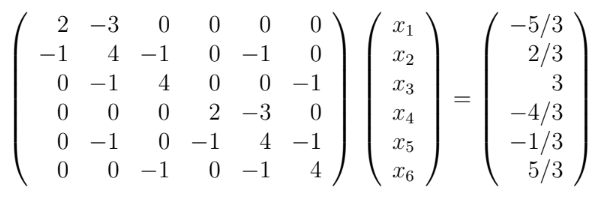

In [9]:
A = [[2,-1,0,0,0,0],
     [-1,4,-1,0,-1,0],
     [0,-1,4,0,0,-1],
     [0,0,0,2,-1,0],
     [0,-1,0,-1,4,-1],
     [0,0,-1,0,-1,4]]   # make 
b = [[-5/3],[2/3],[3],[-4/3],[-1/3],[5/3]]
guess = [[1],[1],[1],[1],[1],[1]]
T = 0.0001

In [10]:
# Find the Inverse using the conjugate gradient method
X,k = conjugate_gradient(A,b,guess,T)
#print the solution using prettytable
print('The number of iterations is: ', k) 
print()  
print("The solution of the linear equation using conjugate gradient method is: ")
table = pt.PrettyTable()
table.field_names = ["X1", "X2", "X3", "X4", "X5", "X6"]
table.add_row([X[0], X[1], X[2], X[3], X[4], X[5]])
print(table)


The number of iterations is:  6

The solution of the linear equation using conjugate gradient method is: 
+---------------+--------------+--------------+---------------+---------------+--------------+
|       X1      |      X2      |      X3      |       X4      |       X5      |      X6      |
+---------------+--------------+--------------+---------------+---------------+--------------+
| [-0.72450805] | [0.21765057] | [0.96660704] | [-0.68574836] | [-0.03816339] | [0.64877758] |
+---------------+--------------+--------------+---------------+---------------+--------------+


In [11]:
i = LinearEquationIndirect(A, b)
j = i.diag_dmnt(A)
G = i.Gauss_Seidel(A,b,4)

Number of iterations is: 11 
 The solution vector x for gauss seidel method is:

[[-0.7245438449511615], [0.2176230208860943], [0.9665955007524948], [-0.6857705636696967], [-0.03818047349826274], [0.6487704234802247]]


# Q.4

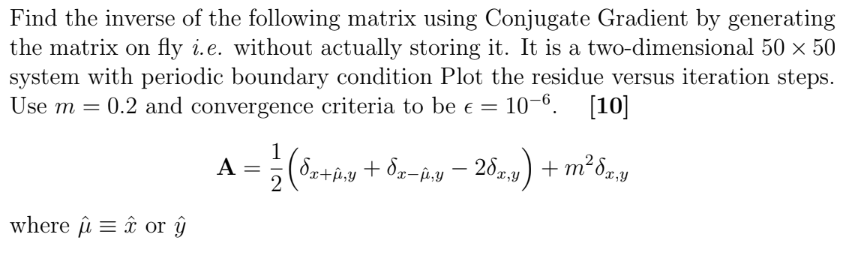

In [12]:
n = 50
m = 0.2
# define the delta function
def delta(i, j):
    return 1 if i == j else 0

# define the A matrix
def A_ij(i, j, mu = 1, m = 0.21):
    return 0.5 * (
        delta(i + mu, j)
      + delta(i - mu, j)
      - 2*delta(i, j)
    ) + m**2 * delta(i, j) if not ((i == 0 and j == n-1) or (i == n-1 and j == 0)) else 0.5   # impose periodic boundary conditions


In [17]:
all_residues = []
for i in trange(n):
    Bi = np.zeros((n, 1))
    Bi[i, 0] = 1
    x, ite, residues = conjugate_gradient_no_store(A_ij, Bi, x0 = np.random.rand(n, 1), tol = 1e-6, max_iter=100)
    # print(A_ij)
    # here we are not storing the x values to make the A_inv matrix, as explained above
    all_residues.append(residues)

all_residues = np.array(all_residues)

100%|██████████| 50/50 [00:09<00:00,  5.11it/s]


Text(0, 0.5, 'residue')

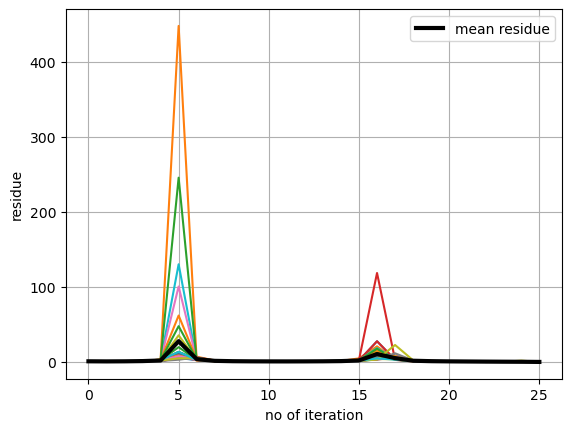

In [18]:
plt.plot(all_residues.T)
# plt.xscale("log")
# plt.ylim(0, 1)
plt.plot(all_residues.mean(axis = 0), "k-", label="mean residue", linewidth=3)
plt.legend()
plt.grid()
plt.xlabel("no of iteration")
plt.ylabel("residue")